In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
sns.set(style='whitegrid')
%matplotlib inline


In [2]:
data = '''CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3
10,Female,30,19,72
11,Male,67,20,14
12,Female,35,20,99
13,Female,58,21,15
14,Female,24,21,77
15,Male,37,22,13
16,Male,22,22,79
17,Female,35,23,35
18,Male,20,23,66
19,Male,52,24,29
20,Male,35,24,98
21,Female,35,25,35
22,Male,25,25,73
23,Female,46,31,14
24,Male,31,31,84
25,Female,54,33,17
26,Male,29,33,88
27,Female,45,34,20
28,Male,35,34,76
29,Female,40,38,17
30,Male,23,38,79
'''
df = pd.read_csv(StringIO(data))
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Shape: (30, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,30.000000,30,30.000000,30.000000,30.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,16,NaN,NaN,NaN
mean,15.500000,NaN,34.533333,23.733333,50.733333
std,8.803408,NaN,13.484943,7.002134,32.907324
min,1.000000,NaN,19.000000,15.000000,3.000000
25%,8.250000,NaN,23.000000,18.250000,17.000000
50%,15.500000,NaN,33.000000,22.000000,53.000000
75%,22.750000,NaN,39.250000,29.500000,78.500000


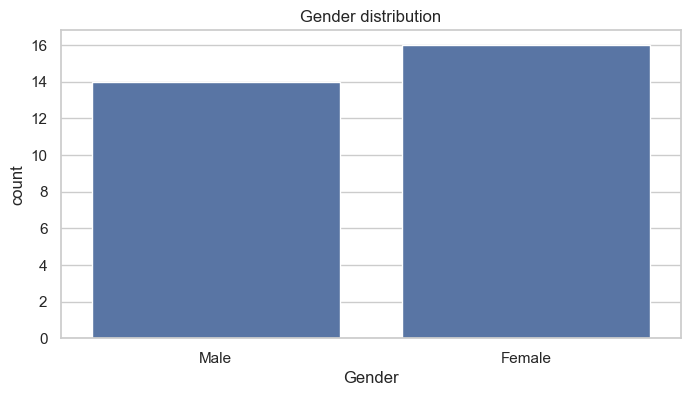

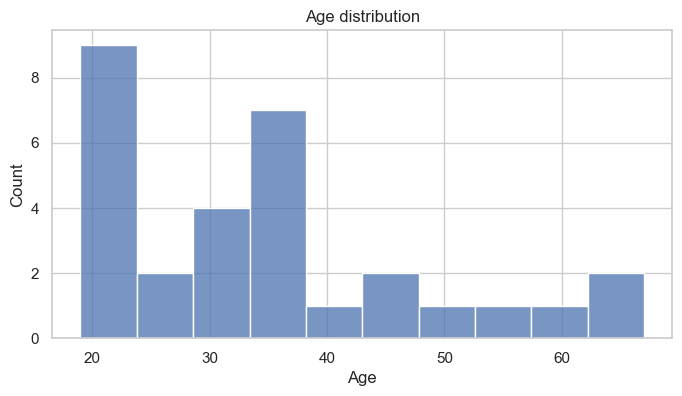

In [3]:
print('Shape:', df.shape)
display(df.describe(include='all'))
plt.figure(figsize=(8,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender distribution')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=10)
plt.title('Age distribution')
plt.show()

In [4]:
df['Income_per_Age'] = df['Annual Income (k$)'] / (df['Age'] + 1)
df['Spend_to_Income'] = df['Spending Score (1-100)'] / (df['Annual Income (k$)'] + 1)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_per_Age,Spend_to_Income
0,1,Male,19,15,39,0.750000,2.437500
1,2,Male,21,15,81,0.681818,5.062500
2,3,Female,20,16,6,0.761905,0.352941
3,4,Female,23,16,77,0.666667,4.529412
4,5,Female,31,17,40,0.531250,2.222222


## 4) Encoding & Scaling

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['Gender_enc'] = le.fit_transform(df['Gender'])
features = ['Age','Annual Income (k$)','Spending Score (1-100)','Income_per_Age','Spend_to_Income','Gender_enc']
X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.17159413, -1.26856063, -0.36265233,  0.07651044,  0.14755714,
         1.06904497],
       [-1.0207451 , -1.26856063,  0.93547817, -0.18376716,  1.82556228,
         1.06904497],
       [-1.09616961, -1.12330559, -1.38261201,  0.12195574, -1.18497635,
        -0.93541435],
       [-0.86989607, -1.12330559,  0.8118467 , -0.24160663,  1.48479093,
        -0.93541435],
       [-0.26649995, -0.97805056, -0.33174446, -0.75854688,  0.00994296,
        -0.93541435]])

## 5) Dimensionality Reduction (PCA) — visualize in 2D

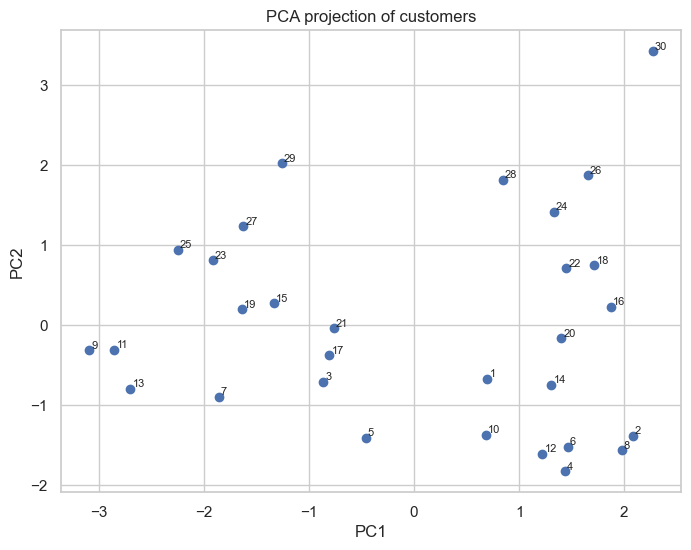

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
for i, cid in enumerate(df['CustomerID']):
    plt.text(X_pca[i,0]+0.02, X_pca[i,1]+0.02, str(cid), fontsize=8)
plt.title('PCA projection of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 6) Find optimal K with Elbow & Silhouette

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

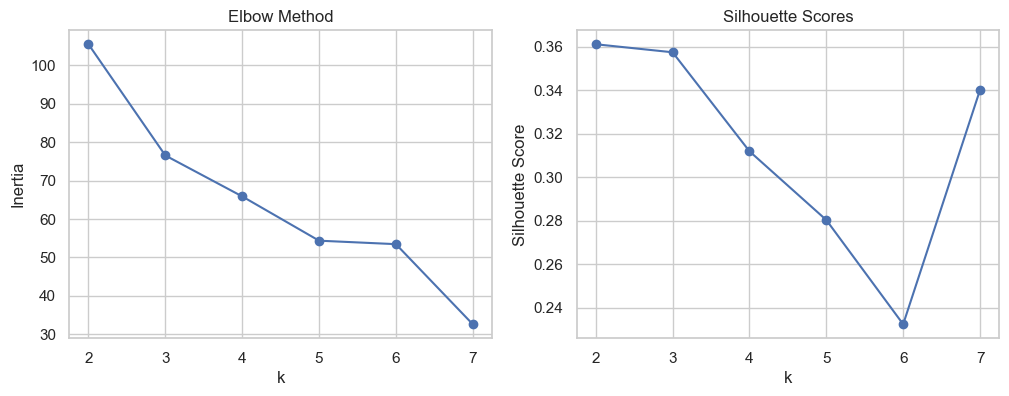

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
sil_scores = []
K = range(2,8)
for k in K:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.subplot(1,2,2)
plt.plot(K, sil_scores, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

## 7) K-Means clustering (choose k from above — example uses k=4)

Centroids (unscaled):


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Income_per_Age,Spend_to_Income,Gender_enc
0,26.857143,18.285714,76.428571,0.670787,3.962216,5.551115e-17
1,45.230769,24.923077,17.230769,0.576531,0.664750,3.076923e-01
2,24.250000,19.000000,74.250000,0.763752,3.713696,1.000000e+00
3,27.166667,30.666667,77.666667,1.108884,2.494666,1.000000e+00


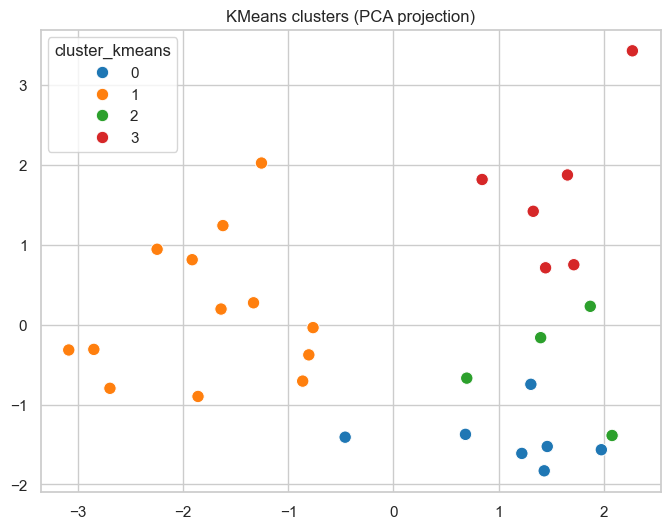

In [8]:
k = 4
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
df['cluster_kmeans'] = kmeans.labels_
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print('Centroids (unscaled):')
centroids_df = pd.DataFrame(centroids, columns=features)
display(centroids_df)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster_kmeans'], palette='tab10', s=80)
plt.title('KMeans clusters (PCA projection)')
plt.show()

## 8) Agglomerative (Hierarchical) Clustering & Dendrogram

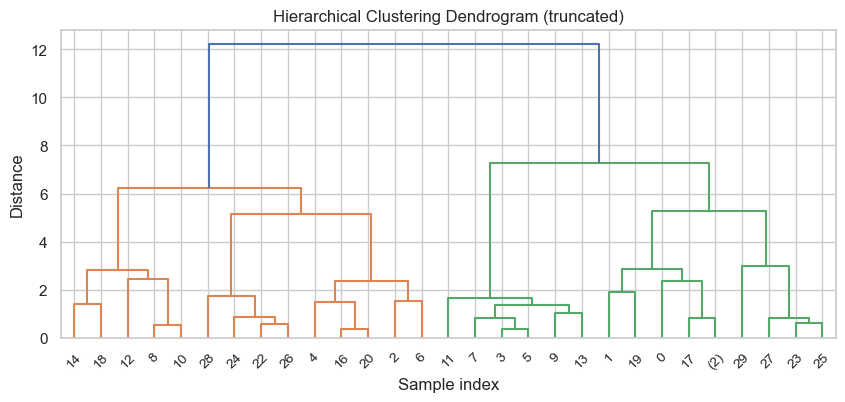

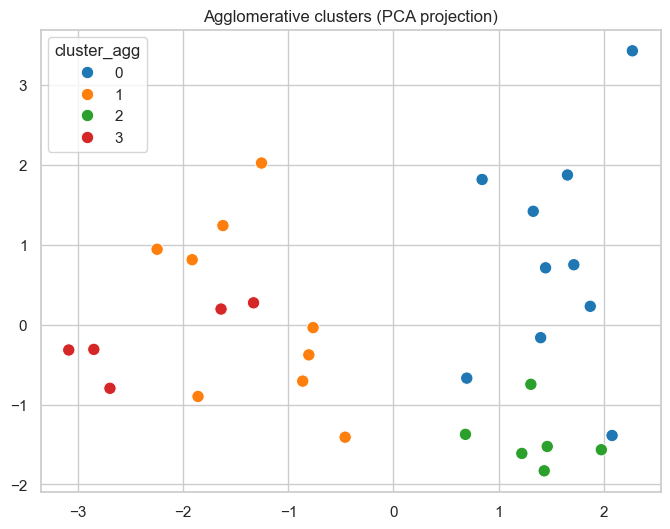

In [9]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10,4))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

agg = AgglomerativeClustering(n_clusters=4).fit(X_scaled)
df['cluster_agg'] = agg.labels_
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster_agg'], palette='tab10', s=80)
plt.title('Agglomerative clusters (PCA projection)')
plt.show()

## 9) DBSCAN — detect outliers/noise

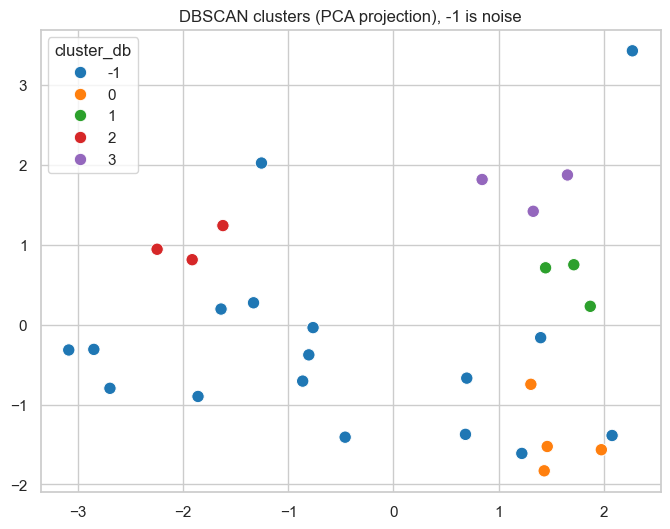

In [10]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.9, min_samples=3).fit(X_scaled)
df['cluster_db'] = db.labels_
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster_db'], palette='tab10', s=80)
plt.title('DBSCAN clusters (PCA projection), -1 is noise')
plt.show()

## 10) Cluster Profiling & Business Insights

Create readable summaries for each cluster (size, avg age, income, spending score) and map them to action-oriented personas.

In [11]:
def profile(df, cluster_col='cluster_kmeans'):
    prof = df.groupby(cluster_col).agg(
        count=('CustomerID','count'),
        avg_age=('Age','mean'),
        avg_income=('Annual Income (k$)','mean'),
        avg_spend=('Spending Score (1-100)','mean')
    ).reset_index()
    return prof

prof_k = profile(df,'cluster_kmeans')
prof_agg = profile(df,'cluster_agg')
print('KMeans profile:')
display(prof_k)
print('Agglomerative profile:')
display(prof_agg)


KMeans profile:


,cluster_kmeans,count,avg_age,avg_income,avg_spend
0,0,7,26.857143,18.285714,76.428571
1,1,13,45.230769,24.923077,17.230769
2,2,4,24.250000,19.000000,74.250000
3,3,6,27.166667,30.666667,77.666667


Agglomerative profile:


,cluster_agg,count,avg_age,avg_income,avg_spend
0,0,10,26.000000,26.000000,76.300000
1,1,9,37.888889,26.111111,21.111111
2,2,6,26.166667,18.500000,82.500000
3,3,5,55.600000,21.200000,14.800000


### Suggested persona mapping (example)
- **Cluster A (High income, high spending):** Target with premium loyalty programs and cross-sell.
- **Cluster B (Low income, high spending score):** Price-sensitive but engaged — seasonal promotions.
- **Cluster C (Low spending):** Re-engagement campaigns and discounts to increase frequency.
- **Cluster D (Older, low spend):** Introduce value bundles and convenience-focused offers.
